In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy
from sklearn.mixture import GaussianMixture
from patsy import dmatrices
from patsy import dmatrix
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

In [65]:
#loading the data set
mcdonalds = pd.read_csv("mcdonalds.csv")
mcdonalds1 = pd.read_csv("mcdonalds.csv")

#Viewing column names
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [3]:
#Checking dimensions
mcdonalds.shape

(1453, 15)

In [4]:
#Viewing first 5 rows
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
md = mcdonalds.iloc[:, 0:11].replace("Yes",1).replace("No",0)
mean = round(md.mean(),2)
mean

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2620\1164781924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  md = mcdonalds.iloc[:, 0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [6]:
#Initiating PCA
pca = PCA()
md_pca = pca.fit_transform(md)
md_p = pca.fit(md)

#Calculating S.D. of PC
sd = np.sqrt(pca.explained_variance_)

#Get the proportion of variance in PC
pv = pca.explained_variance_ratio_

#Creating index labels for PC
index = []
for i in range(len(sd)):
    i=i+1
    index.append("PC{}".format(i))

sum = pd.DataFrame({"Standard Deviation":sd, "Proportion of Variance":pv, "Cumulative Proportion":pv.cumsum()}, index=index)
sum

,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [7]:
print("Standard Deviation:\n", sd.round(1))

#Extracting PCA loadings
load = (pca.components_)

#Transposing the matrix
rot_matrix = md_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=md.columns.values, columns=index)
rot_df = round(rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,0.055,0.308,-0.171,-0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,-0.142,-0.278,0.348,-0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,0.198,-0.071,0.355,0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,-0.354,0.073,0.407,-0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,0.254,-0.361,-0.209,0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,-0.097,-0.108,0.595,-0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,0.119,0.129,0.103,-0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,-0.003,0.211,0.077,0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,0.068,0.003,0.261,-0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,0.763,-0.288,0.178,-0.350,-0.176,0.186,0.038,-0.158


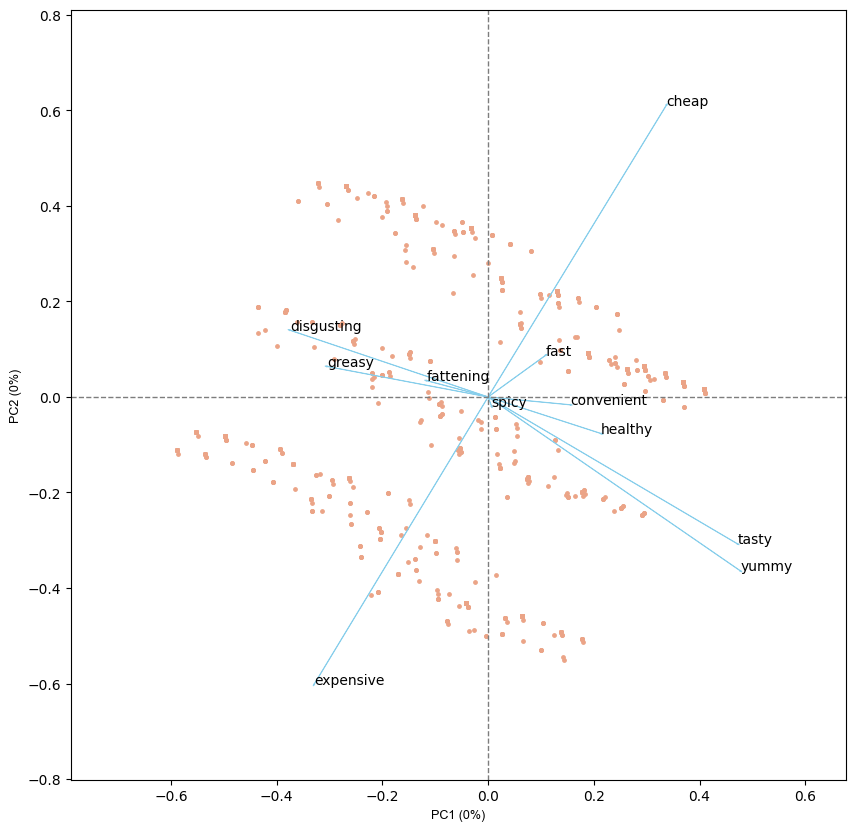

In [56]:
#Plotting biplot to visualize PCA
cluster.biplot(cscore=md_pca, loadings=load, labels=mcdonalds.columns.values, var1=0, var2=0, show=True, dim=(10,10))

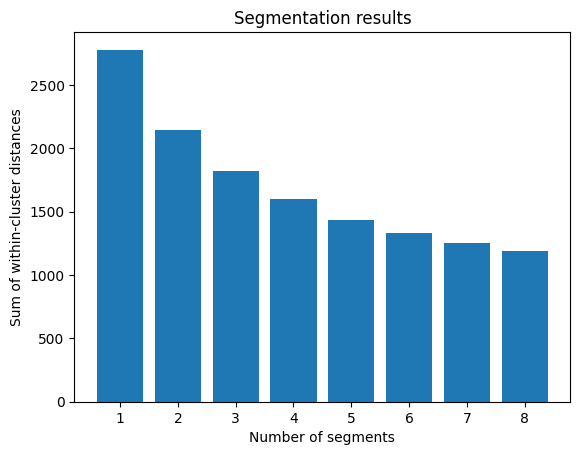

In [57]:
#K-means clutering
np.random.seed(1234)

nrep = 10

num_segments = range(1,9)
within_cluster_distances = []
md_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(md)
    within_cluster_distances.append((kmeans.inertia_))
    md_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation results")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2620\2190469821.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)


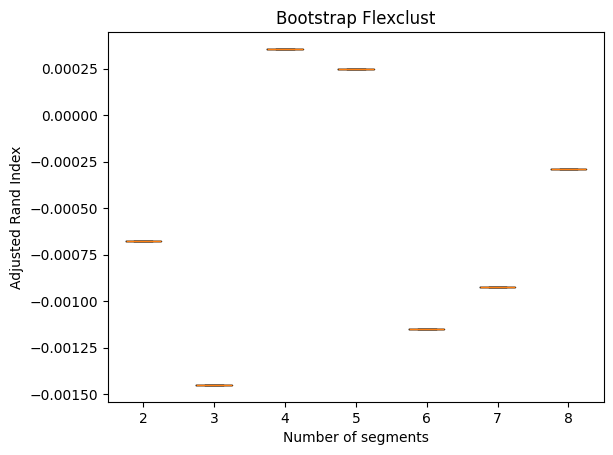

In [58]:
np.random.seed(1234)
nboot = 100
nrep = 10

#Generate Bootstrap samples
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(md.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

#Adjusting rand index
adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(md.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

#Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

#Plotting boxplot of the adjusted rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

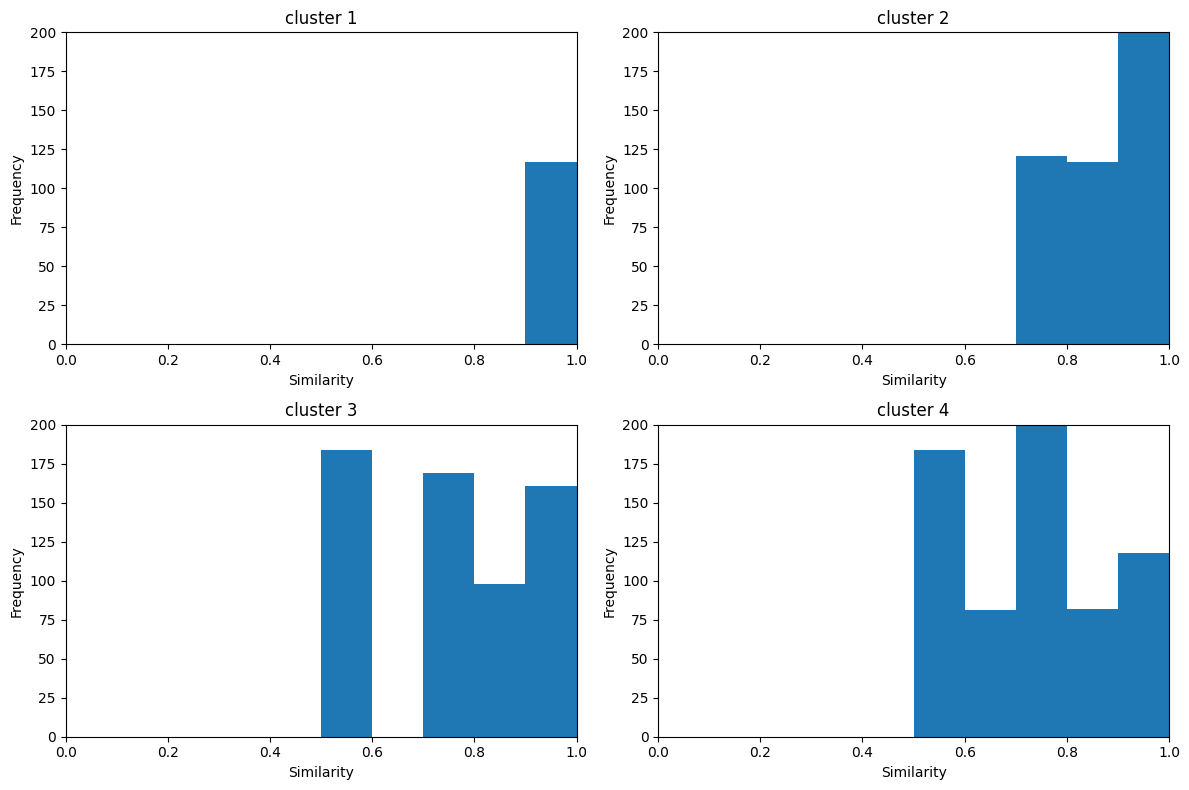

In [14]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12,8))

for i in range(1, 5):
    labels = md_km28[str(i)].predict(md)
    similarities = md_km28[str(i)].transform(md).min(axis=1)
    row = (i - 1)//2
    col = (i -1)%2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

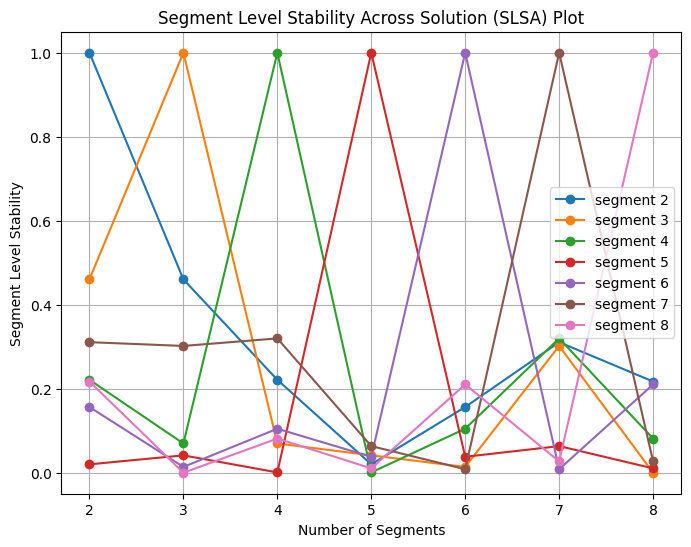

In [18]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = md_km28[str(segment)].predict(md)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solution (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

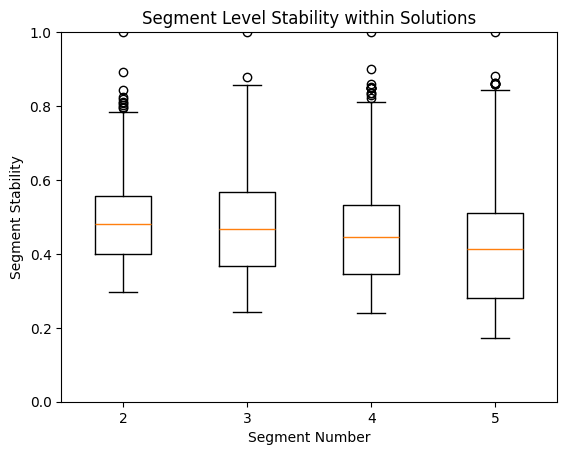

In [21]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = md_km28[segment].predict(md)
    segment_similarities[segment] = md_km28[segment].transform(md).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [24]:
np.random.seed(1234)
k_values = range(2, 9)
md_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(md.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = md.shape
    aic = -2*log_likelihood + 2*k
    bic = -2*log_likelihood + np.log(n_samples)*k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic-class_entropy

    md_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
md_m28 = pd.DataFrame(md_m28, columns=['iter', 'converged', 'k', 'k0', 'loglik', 'AIC', 'BIC', 'ICL'])

print(md_m28)

   iter  converged  k  k0       loglik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


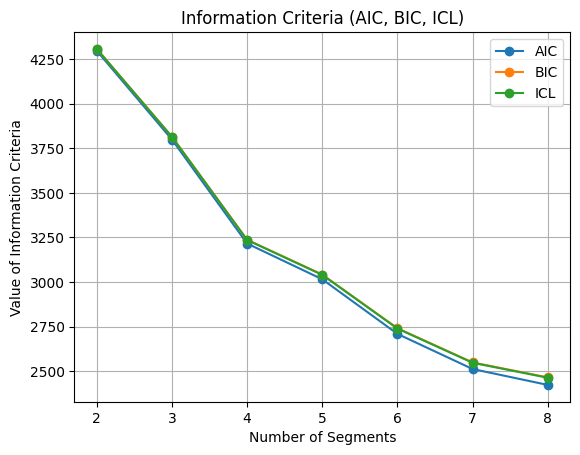

In [25]:
#Plotting the information criteria
num_segments = md_m28["k"]
AIC_values = md_m28["AIC"]
BIC_values = md_m28["BIC"]
ICL_values = md_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [30]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(md)
kmeans_clusters = kmeans.predict(md)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(md)
gmm_clusters = gmm.predict(md)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

md_m4 = md[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(md_m4)
k4_m4_clusters = k4_m4.predict(md_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [34]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(md)

log_likelihood_m4a = gmm_m4a.score(md)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(md)

log_likelihood_m4 = gmm_m4.score(md)

print("Log-Likelihood for md.m4a:", log_likelihood_m4a)
print("Log-Likelihood for md.m4a:", log_likelihood_m4)

Log-Likelihood for md.m4a: 3.642746401176581
Log-Likelihood for md.m4a: 10.32549399951885


In [36]:
like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2620\3132807519.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(mcdonalds['Like'])


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [77]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I LOVE IT!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

like_n_counts = mcdonalds['Like.n'].value_counts()

print(like_n_counts)

Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [80]:
independent_vars = mcdonalds.columns[0:11]

formula_str = '+'.join(independent_vars)

formula_str = 'Like ~ '  + formula_str

f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [81]:
X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

n_components = 2
n_init = 10
verbose = False
n_rep = 10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
md_reg2 = model.fit(X, y)

print(md_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster Sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster Sizes:
1: 468
2: 985


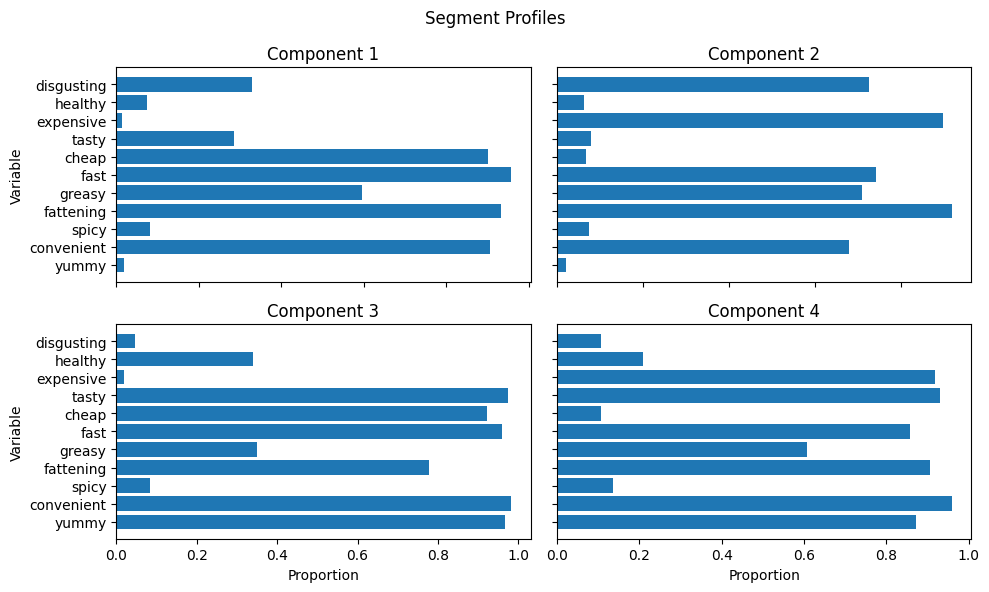

In [82]:
kmeans = md_km28['4']

labels = kmeans.labels_

md_mean = md.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(md_mean.shape[1]), md_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(md_mean.shape[1]), md_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(md_mean.shape[1]), md_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(md_mean.shape[1]), md_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(md_mean.shape[1]))
    ax.set_yticklabels(md.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

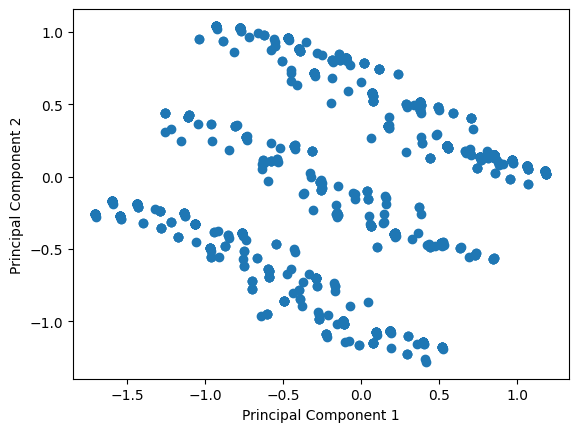

In [83]:
#K-Means Clustering & PCA
kmeans = KMeans(n_clusters=4)
kmeans.fit(md)

pca = PCA(n_components=2)
md_pca = pca.fit_transform(md)

fig, ax = plt.subplots()

ax.scatter(md_pca[:, 0], md_pca[:, 1])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()

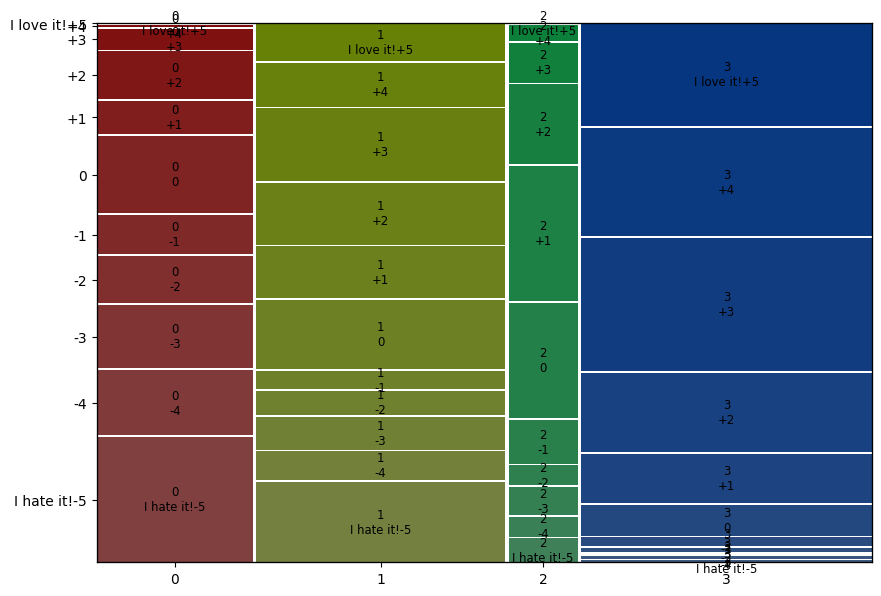

In [87]:
#Label encoding for categorical columns - Converting 11 cols with yes/no
def labelling(x):
    mcdonalds1[x] = LabelEncoder().fit_transform(mcdonalds1[x])
    return mcdonalds1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonalds1
df_eleven = mcdonalds1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
mcdonalds1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(mcdonalds1['cluster_num'], mcdonalds1['Like'])

#Reordering cols
mcdonalds1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
crosstab 
plt.rcParams['figure.figsize'] = (10,7)
mosaic(crosstab.stack())
plt.show()

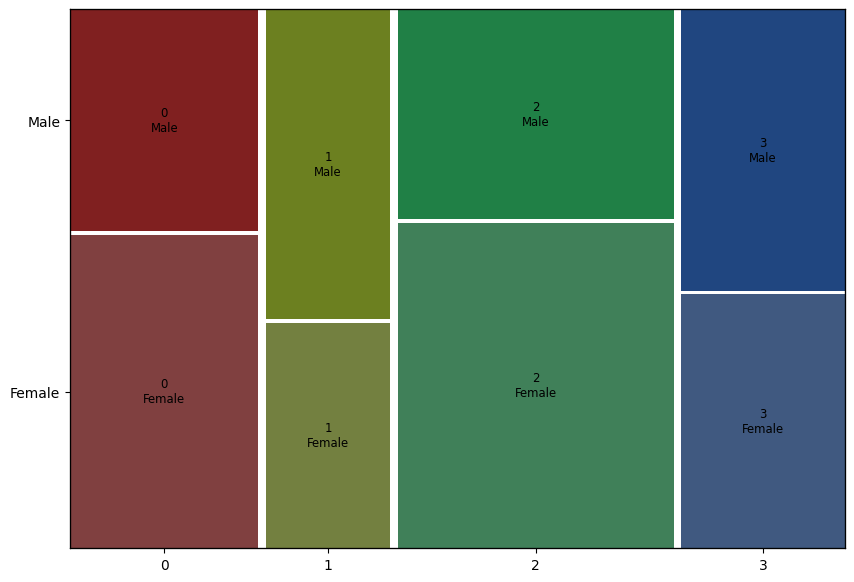

In [90]:
md_k4=md_km28['4']
k4 = md_k4.labels_

ct = pd.crosstab(k4, mcdonalds['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

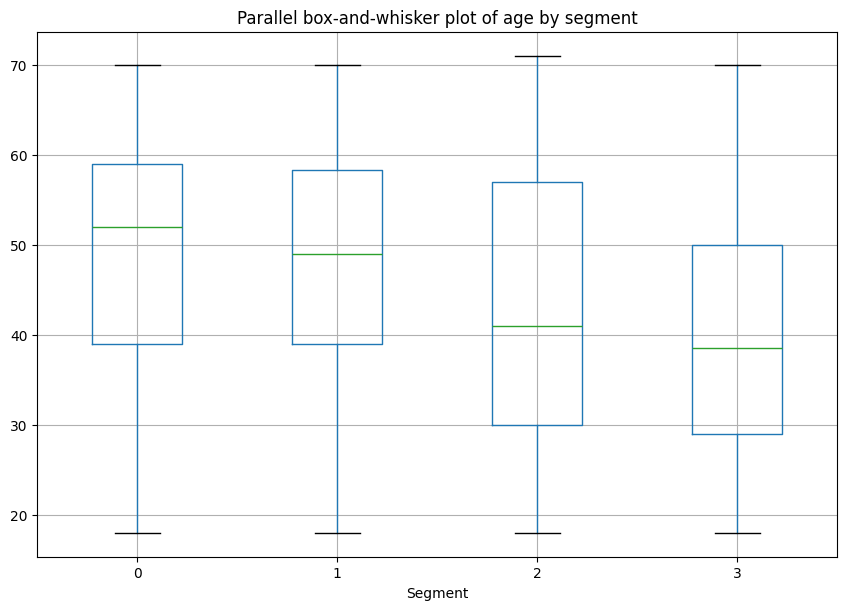

In [91]:
df = pd.DataFrame({'Segment': k4, 'Age': mcdonalds['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [98]:
mcdonalds1['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds1['VisitFrequency'])
visit = mcdonalds1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [93]:
#Like
mcdonalds1['Like'] = LabelEncoder().fit_transform(mcdonalds1['Like'])
Like = mcdonalds1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [94]:
mcdonalds1['Gender'] = LabelEncoder().fit_transform(mcdonalds1['Gender'])
Gender = mcdonalds1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


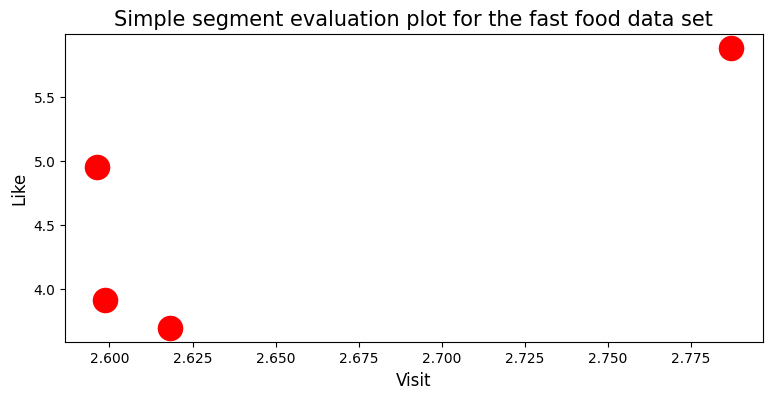

In [104]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = 'VisitFrequency', y = 'Like', data=segment, s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

**<font size=50>Thank You</font>**